# Initial data and problem exploration



In [2]:
import xarray as xr
import urllib.request

## UK Met Office Global datasets on AWS

Following https://github.com/MetOffice/aws-earth-examples/blob/master/examples/1.%20Getting%20Started.ipynb

In [7]:
import boto3

In [8]:
s3 = boto3.resource('s3')

In [15]:
my_bucket = s3.Bucket('aws-earth-mo-atmospheric-global-prd')

In [16]:
for my_bucket_object in my_bucket.objects.all():
    print(my_bucket_object)

NoCredentialsError: Unable to locate credentials

In [2]:
sample_sns_message = {
    'model': 'mo-atmospheric-mogreps-g-prd',
    'ttl': 1544268873,
    'time': '2018-12-13T09:00:00Z',
    'created_time': '2018-12-06T11:22:27Z',
    'name': 'air_temperature',
    'object_size': 711463962,
    'forecast_period': 615600,
    'forecast_reference_time': '2018-12-06T06:00:00Z',
    'pressure': '100000.0 97500.0 95000.0 92500.0 90000.0 85000.0 80000.0 75000.0 70000.0 65000.0 60000.0 55000.0 50000.0 45000.0 40000.0 37500.0 35000.0 32500.0 30000.0 27500.0 25000.0 22500.0 20000.0 17500.0 15000.0 12500.0 10000.0 7000.0 5000.0 4000.0 3000.0 2000.0 1000.0',
    'forecast_period_units': 'seconds',
    'pressure_units': 'Pa',
    'bucket': 'aws-earth-mo-examples',
    'key': 'cafef7005477edb001aa7dc50eab78c5ef89d420.nc',
    'realization': '0 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34'
}

In [3]:
def download_data_object(sns_message):
    url = "https://s3.eu-west-2.amazonaws.com/" + sns_message['bucket'] + "/" + sns_message['key']
    urllib.request.urlretrieve(url, sns_message['key']) # save in this directory with same name

In [4]:
download_data_object(sample_sns_message)

KeyboardInterrupt: 

https://data.informaticslab.co.uk/mogreps_data_basics.html

In [17]:
def make_data_object_name(dataset_name, year, month, day, hour, realization, forecast_period):
    template_string = "prods_op_{}_{:02d}{:02d}{:02d}_{:02d}_{:02d}_{:03d}.nc"
    return template_string.format(dataset_name, year, month, day, hour, realization, forecast_period)

def download_data_object(dataset_name, data_object_name):
    url = "https://s3.eu-west-2.amazonaws.com/" + dataset_name + "/" + data_object_name
    urllib.request.urlretrieve(url, data_object_name) # save in this directory with same name

In [20]:
obj_name = make_data_object_name('mogreps-uk', 2020, 1, 1, 3, 0, 3)
download_data_object('mogreps-uk', obj_name)

HTTPError: HTTP Error 404: Not Found

In [19]:
!ls

01-Initial_EDA.ipynb
cafef7005477edb001aa7dc50eab78c5ef89d420.nc
prods_op_mogreps-uk_20130101_03_00_003.nc


## TIGGE ECMWF

In [21]:
from ecmwfapi import ECMWFDataServer
server = ECMWFDataServer()
server.retrieve({
    "class": "ti",
    "dataset": "tigge",
    "date": "2020-11-01/to/2020-11-02",
    "expver": "prod",
    "levtype": "sfc",
    "origin": "ecmf",
    "param": "228228",
    "step": "0/6/12/18/24/30/36/42/48/54/60/66/72",
    "time": "00:00:00",
    "type": "cf",
    "target": "output",
})

2020-11-29 07:54:41 ECMWF API python library 1.6.1
2020-11-29 07:54:41 ECMWF API at https://api.ecmwf.int/v1
2020-11-29 07:54:41 Welcome Stephan Rasp
2020-11-29 07:54:43 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-11-29 07:54:43 Request submitted
2020-11-29 07:54:43 Request id: 5fc345b3a3a6e62bab4d2e4f
2020-11-29 07:54:43 Request is submitted
2020-11-29 07:54:45 Request is active


KeyboardInterrupt: 

## YOPP

In [24]:
ds = xr.open_dataset('../data/yopp.grib', engine='pynio').TP_GDS4_SFC

In [25]:
ds

<xarray.Dataset>
Dimensions:                (forecast_time1: 17, g4_lat_2: 1280, g4_lon_3: 2576, initial_time0_hours: 2)
Coordinates:
  * initial_time0_hours    (initial_time0_hours) datetime64[ns] 2020-11-01 20...
  * g4_lat_2               (g4_lat_2) float32 89.892395 89.753006 ... -89.892395
  * g4_lon_3               (g4_lon_3) float32 0.0 0.13975145 ... 359.86
  * forecast_time1         (forecast_time1) timedelta64[ns] 00:00:00 ... 2 da...
Data variables:
    TP_GDS4_SFC            (initial_time0_hours, forecast_time1, g4_lat_2, g4_lon_3) float32 ...
    initial_time0_encoded  (initial_time0_hours) float64 ...
    initial_time0          (initial_time0_hours) |S0 ...

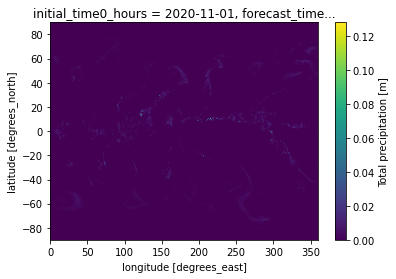

In [28]:
ds.TP_GDS4_SFC[0, 1].plot()

## NRMS data

In [29]:
radar = xr.open_dataset(
    '../data/2020110100/CONUS/MultiSensor_QPE_03H_Pass1/MRMS_MultiSensor_QPE_03H_Pass1_00.00_20201101-000000.grib2',
    engine='pynio'
)

In [34]:
radar.VAR_209_6_31_P0_L102_GLL0.min()

<xarray.DataArray 'VAR_209_6_31_P0_L102_GLL0' ()>
array(0.)

In [5]:
def download_nrms_from_cache(year, month, day, hour, path):
    month = str(month).zfill(2)
    day = str(day).zfill(2)
    hour = str(hour).zfill(2)
    fn = f'{year}{month}{day}{hour}.zip'
    url = f"https://mrms.agron.iastate.edu/{year}/{month}/{day}/{fn}"
    zip_fn = f'{path}/{fn}'
    urllib.request.urlretrieve(url, zip_fn)
    return zip_fn

In [4]:
zip_fn = download_nrms_from_cache(2020, 10, 23, 0, '../data/')

In [6]:
zip_fn = '../data/2020102300.zip'

In [10]:
from zipfile import ZipFile
def unzip_file(zip_fn, tmp_path):
    zf = ZipFile(zip_fn, 'r')
    zf.extractall(tmp_path)
    zf.close()

In [11]:
unzip_file(zip_fn, '../data/tmp/')

In [15]:
!ls ../data/tmp/2020102300/CONUS/RadarAccumulationQualityIndex_03H

MRMS_RadarAccumulationQualityIndex_03H_00.00_20201023-000000.grib2.gz


In [21]:
import gzip
def gunzip_file(gz_fn, out_fn=None):
    if not out_fn: out_fn = gz_fn[:-3]
    with gzip.open(gz_fn, 'rb') as f_in:
        with open(out_fn, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

In [32]:
import os
import shutil
def move_relevant_file(year, month, day, hour, variable, tmp_path, save_path):
    month = str(month).zfill(2)
    day = str(day).zfill(2)
    hour = str(hour).zfill(2)
    fn = f'MRMS_{variable}_00.00_{year}{month}{day}-{hour}0000.grib2'
    gz_fn = f'{tmp_path}/{year}{month}{day}{hour}/CONUS/{variable}/{fn}.gz'
    os.makedirs(f'{save_path}/{variable}', exist_ok=True)
    save_fn  = f'{save_path}/{variable}/{fn}'
    gunzip_file(gz_fn, save_fn)

In [33]:
move_relevant_file(2020, 10, 23, 0, 'MultiSensor_QPE_03H_Pass1', '../data/tmp/', '../data/')

In [34]:
default_variables = [
    'MultiSensor_QPE_01H_Pass1',
    'MultiSensor_QPE_03H_Pass1',
    'MultiSensor_QPE_06H_Pass1',
    'RadarOnly_QPE_01H',
    'RadarOnly_QPE_03H',
    'RadarOnly_QPE_06H',
]

In [37]:
def download_and_extract(year, month, day, hour, tmp_path, save_path, delete=True, zip_fn=None,
                         variables=None):
    zip_fn = zip_fn or download_nrms_from_cache(year, month, day, hour, tmp_path)
    unzip_file(zip_fn, tmp_path)
    variables = variables or default_variables
    for v in variables:
        move_relevant_file(year, month, day, hour, v, tmp_path, save_path)
    if delete:
        os.rm(zip_fn)
        shutil.rmtree(f'tmp_dir/{year}{month}{day}{hour}')
    

In [39]:
download_and_extract(2020, 10, 23, 1, '../data/tmp/', '../data/')

NotADirectoryError: [Errno 20] Not a directory: '../data/tmp//2020102301.zip'

In [42]:
shutil.rmtree('../data/tmp//2020102301')

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
def download_loop(start_date, stop_date, tmp_path, save_path, variables=None):
    dates = pd.DatetimeIndex(np.arange(start_date, stop_date, dtype='datetime64[h]'))
    for d in tqdm(dates):
        download_and_extract(d.year, d.month, d.day, d.hour, tmp_path, save_path, variables=variables)

In [43]:
!ls ../data/RadarOnly_QPE_01H/

MRMS_RadarOnly_QPE_01H_00.00_20201023-000000.grib2
MRMS_RadarOnly_QPE_01H_00.00_20201023-010000.grib2


In [44]:
ds = xr.open_mfdataset('../data/RadarOnly_QPE_01H/*', engine='pynio')

ValueError: Could not find any dimension coordinates to use to order the datasets for concatenation

In [46]:
ds1 = xr.open_dataset('../data/RadarOnly_QPE_01H/MRMS_RadarOnly_QPE_01H_00.00_20201023-000000.grib2', engine='pynio')
ds2 = xr.open_dataset('../data/RadarOnly_QPE_01H/MRMS_RadarOnly_QPE_01H_00.00_20201023-010000.grib2', engine='pynio')

In [47]:
ds1

<xarray.Dataset>
Dimensions:                       (lat_0: 3500, lon_0: 7000)
Coordinates:
  * lat_0                         (lat_0) float32 54.995 54.985 ... 20.005001
  * lon_0                         (lon_0) float32 230.005 230.015 ... 299.995
Data variables:
    RadarOnlyQPE01H_P0_L102_GLL0  (lat_0, lon_0) float32 ...

In [48]:
ds2

<xarray.Dataset>
Dimensions:                       (lat_0: 3500, lon_0: 7000)
Coordinates:
  * lat_0                         (lat_0) float32 54.995 54.985 ... 20.005001
  * lon_0                         (lon_0) float32 230.005 230.015 ... 299.995
Data variables:
    RadarOnlyQPE01H_P0_L102_GLL0  (lat_0, lon_0) float32 ...

In [52]:
path = '../data/RadarOnly_QPE_01H/'
fns = sorted(glob(f'{path}/*'))
fns

['../data/RadarOnly_QPE_01H/MRMS_RadarOnly_QPE_01H_00.00_20201023-000000.grib2',
 '../data/RadarOnly_QPE_01H/MRMS_RadarOnly_QPE_01H_00.00_20201023-010000.grib2']

In [53]:
fn = fns[0]
fn

'../data/RadarOnly_QPE_01H/MRMS_RadarOnly_QPE_01H_00.00_20201023-000000.grib2'

In [61]:
def time_from_fn(fn):
    s = fn.split('/')[-1].split('_')[-1]
    year = s[:4]
    month = s[4:6]
    day = s[6:8]
    hour = s[9:11]
    return np.datetime64(f'{year}-{month}-{day}T{hour}')

In [62]:
time_from_fn(fn)

numpy.datetime64('2020-10-23T00','h')

In [59]:
import numpy as np

In [60]:
np.datetime64(2020, 10)

TypeError: Invalid object for specifying NumPy datetime metadata

In [56]:
fn.split('/')[-1].split('_')[-1]

'20201023-000000.grib2'

In [69]:
from glob import glob
def open_nrms(path):
    fns = sorted(glob(f'{path}/*'))
    dss = [xr.open_dataset(fn, engine='pynio') for fn in fns]
    times = [time_from_fn(fn) for fn in fns]
    times = xr.DataArray(times, name='time', dims=['time'], coords={'time': times})
    ds = xr.concat(dss, times).rename({'lat_0': 'latitude', 'lon_0': 'longitude'})
    return ds

In [82]:
lons = slice(260, 280)
lats = slice(35, 25)

In [71]:
ds = open_nrms(path)

In [77]:
ds

<xarray.Dataset>
Dimensions:                       (latitude: 3500, longitude: 7000, time: 2)
Coordinates:
  * time                          (time) datetime64[ns] 2020-10-23 2020-10-23...
  * latitude                      (latitude) float32 54.995 54.985 ... 20.005001
  * longitude                     (longitude) float32 230.005 ... 299.995
Data variables:
    RadarOnlyQPE01H_P0_L102_GLL0  (time, latitude, longitude) float32 -3.0 .....

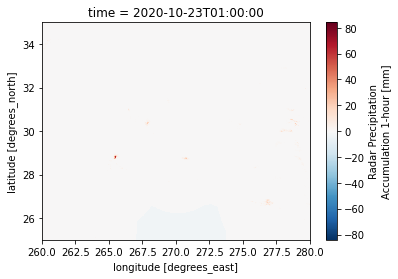

In [85]:
ds.RadarOnlyQPE01H_P0_L102_GLL0.isel(time=1).sel(latitude=lats, longitude=lons).plot()